In [365]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action='ignore')
sns.set()
plt.style.use("ggplot")
%matplotlib inline


In [366]:
# read the dataset from dir
df = pd.read_csv("C:/Users/yaici/OneDrive/Bureau/deployPredictionDiabete/ml-model/diabetes (1).csv")

In [367]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [368]:
# Supervised or Unsupervised
# ans: Supervised->target column
# Regreesion or classification
# ans: classification

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [369]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [370]:
# independent feature->'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
#        'BMI', 'DiabetesPedigreeFunction', 'Age'
# dependent feature-> outcome

# descriptive statistics of the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [371]:
# (row, columns)
df.shape

(768, 9)

In [372]:
# distribution of outcome variable
df.Outcome.value_counts()*100/len(df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

In [373]:
df['Outcome'].value_counts()*100/len(df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

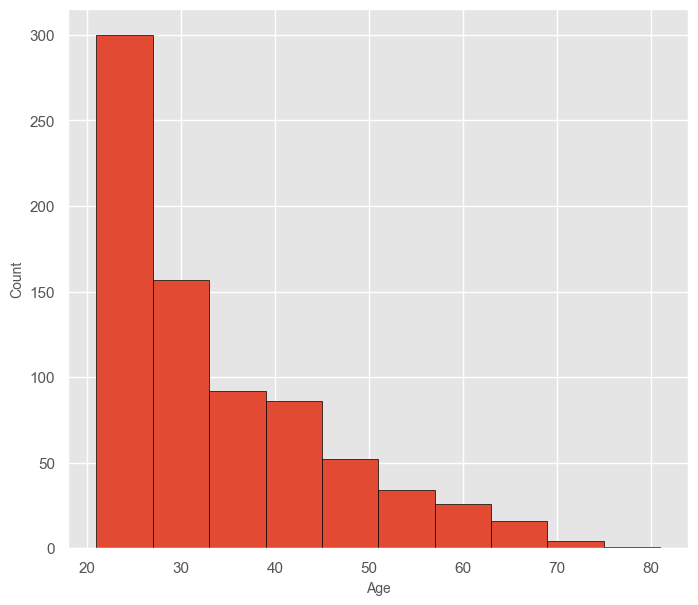

In [374]:
# plot the hist of the age variable
plt.figure(figsize=(8,7))
plt.xlabel('Age', fontsize=10)
plt.ylabel('Count', fontsize=10)
df['Age'].hist(edgecolor="black")

In [375]:
df['Age'].max()

np.int64(81)

In [376]:
df['Age'].min()

np.int64(21)

In [377]:
print("MAX AGE: "+str(df['Age'].max()))
print("MIN AGE: "+str(df['Age'].min()))

MAX AGE: 81
MIN AGE: 21


In [378]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<Axes: xlabel='Age', ylabel='Density'>

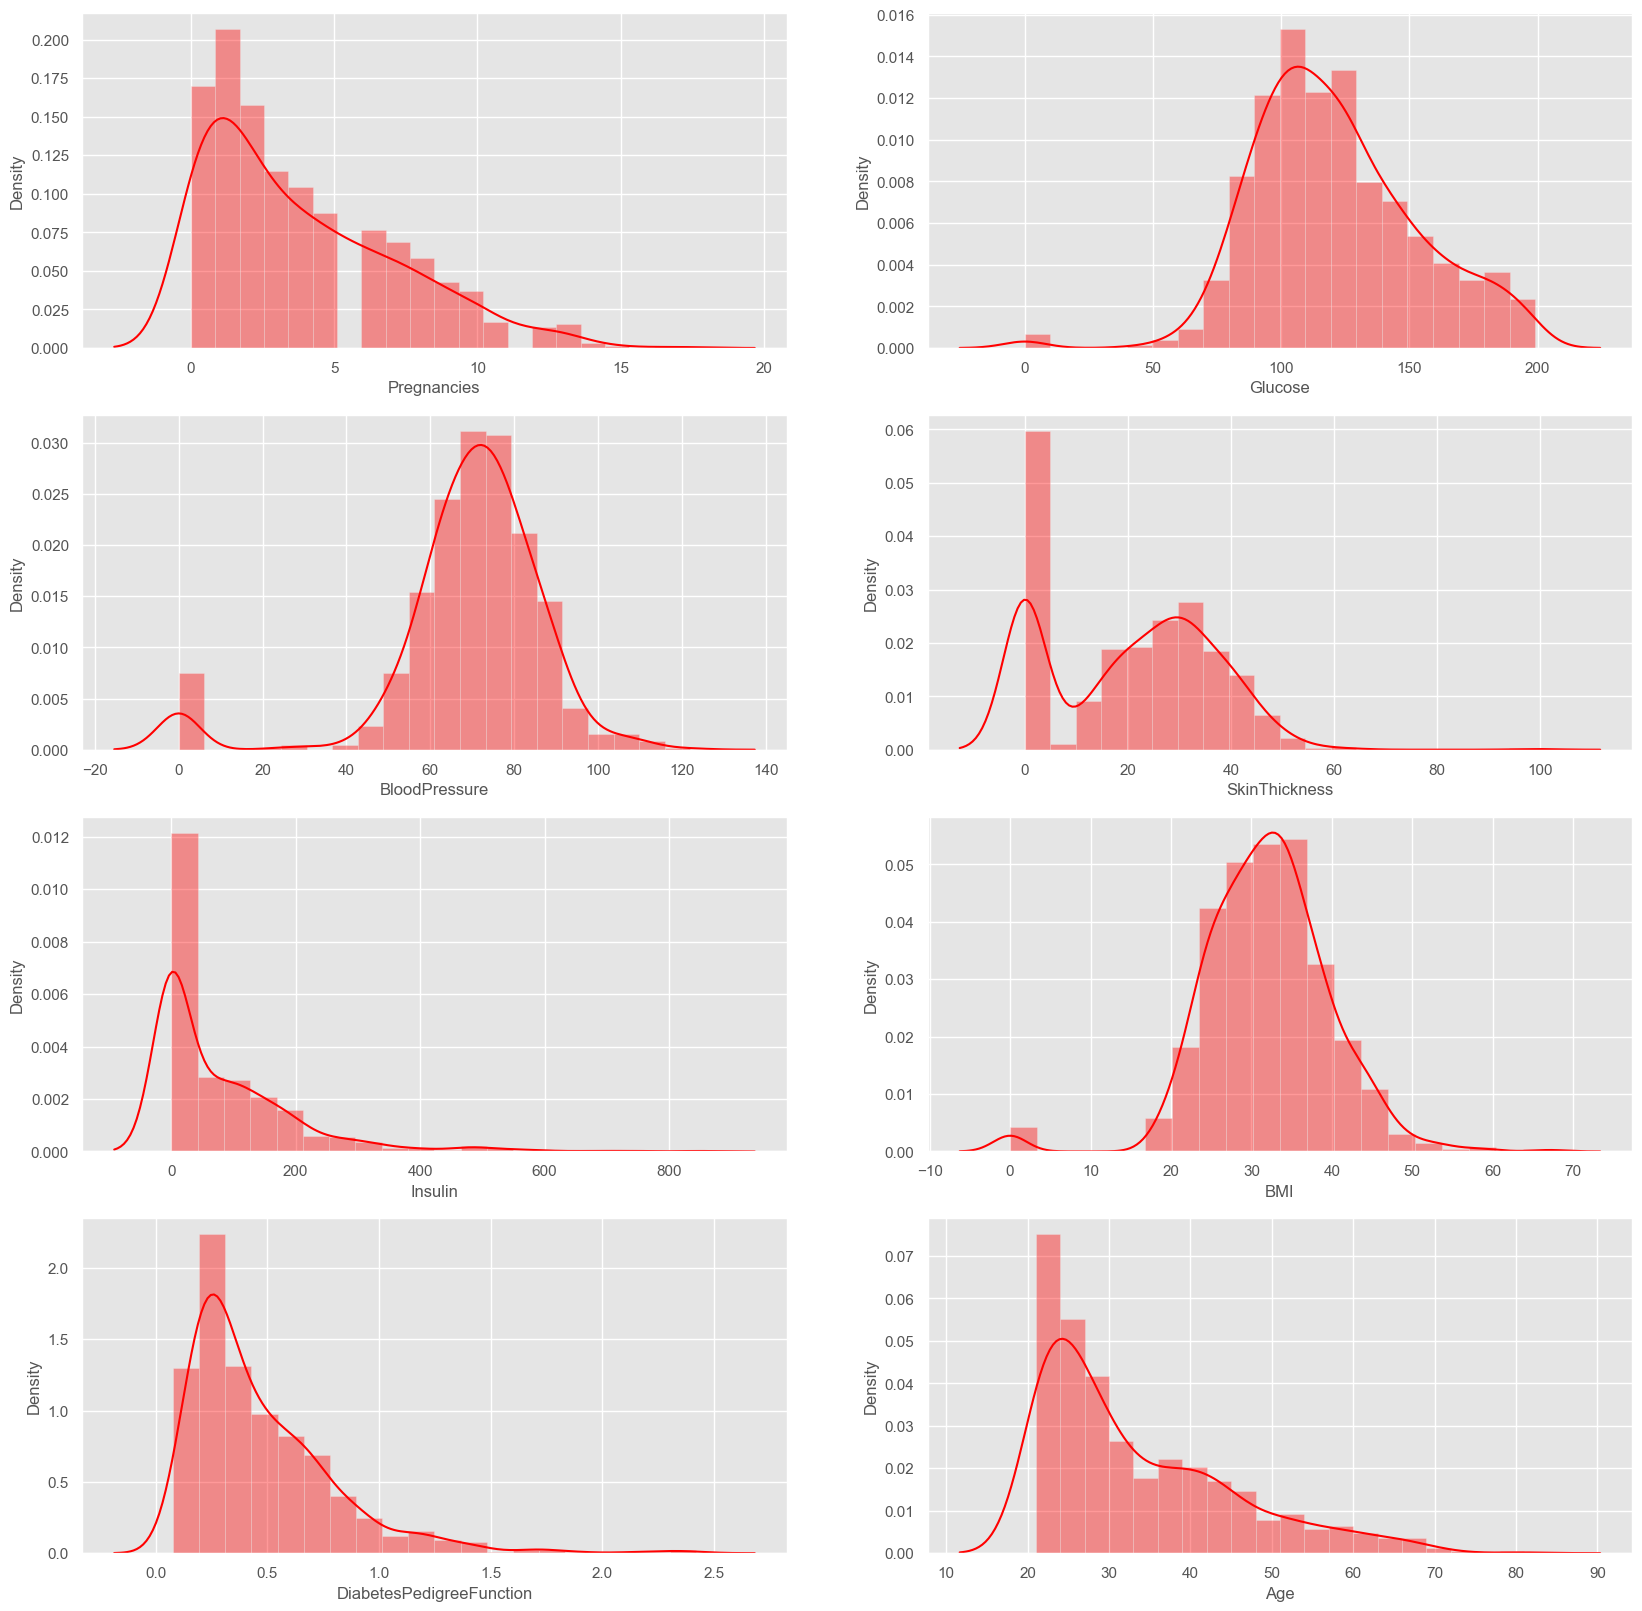

In [379]:
# density graph
# 4*2=8
# columns=2 figure
# having 4 row

# [0,0], [0,1]
# [1,0], [1,1]
# [2,0], [2,1]
# [3,0], [3,1]

fig,ax = plt.subplots(4,2, figsize=(20,20))
sns.distplot(df.Pregnancies, bins=20, ax=ax[0,0], color="red")
sns.distplot(df.Glucose, bins=20, ax=ax[0,1], color="red")
sns.distplot(df.BloodPressure, bins=20, ax=ax[1,0], color="red")
sns.distplot(df.SkinThickness, bins=20, ax=ax[1,1], color="red")
sns.distplot(df.Insulin, bins=20, ax=ax[2,0], color="red")
sns.distplot(df.BMI, bins=20, ax=ax[2,1], color="red")
sns.distplot(df.DiabetesPedigreeFunction, bins=20, ax=ax[3,0], color="red")
sns.distplot(df.Age, bins=20, ax=ax[3,1], color="red")


In [380]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [381]:
#Grouper les données par la colonne "Outcome" (issue ou résultat, comme diabétique ou non),
# puis calculer la moyenne du nombre de grossesses ('Pregnancies') pour chaque groupe.
df.groupby("Outcome").agg({'Pregnancies':'mean'})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [382]:
#Grouper les données par la colonne "Outcome" (issue ou résultat, comme diabétique ou non),
# puis calculer le max du nombre de grossesses ('Pregnancies') pour chaque groupe.
df.groupby("Outcome").agg({'Pregnancies':'max'})

,Pregnancies
Outcome,
0,13
1,17


In [383]:
df.groupby("Outcome").agg({'Glucose':'mean'})

,Glucose
Outcome,
0,109.980000
1,141.257463


In [384]:
df.groupby("Outcome").agg({'Glucose':'max'})

,Glucose
Outcome,
0,197
1,199


In [385]:
# Homework
# 'BloodPressure', 'SkinThickness', 'Insulin',
#        'BMI', 'DiabetesPedigreeFunction', 'Age'
#     groupby-> mean/max

In [386]:
# EDA Part Completed
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [387]:
# Remplacer toutes les occurrences de la valeur 0 par NaN (valeurs manquantes) 

df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']] = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0, np.nan)

In [388]:
# Data preprocessing Part
df.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [389]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [390]:
#median
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [391]:
columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

In [392]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [393]:

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [394]:
# Outlier Detection
# IQR+Q1
# 50%
# 24.65->25%+50%
# 24.65->25%
for feature in df:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    if df[(df[feature]>upper)].any(axis=None):
        print(feature, "yes")
    else:
        print(feature, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


In [395]:
Q1 = df.Insulin.quantile(0.25)
Q3 = df.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df.loc[df['Insulin']>upper, "Insulin"] = upper

In [396]:
# LOF
# local outlier factor
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=10)
lof.fit_predict(df)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

In [397]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [398]:
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:20]

array([-3.06509976, -2.38250393, -2.15557018, -2.11501347, -2.08356175,
       -1.95386655, -1.83559384, -1.74974237, -1.7330214 , -1.71017168,
       -1.70215105, -1.68722889, -1.64294601, -1.64180205, -1.61181746,
       -1.61067772, -1.60925053, -1.60214364, -1.59998552, -1.58761193])

In [399]:
thresold = np.sort(df_scores)[7]

In [400]:
thresold

np.float64(-1.7497423670960557)

In [401]:
outlier = df_scores>thresold

In [402]:
df = df[outlier]

In [403]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [404]:
df.shape

(760, 9)

In [405]:
# Feature Enginnering
NewBMI = pd.Series(["Underweight","Normal", "Overweight","Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")

In [406]:
NewBMI

0    Underweight
1         Normal
2     Overweight
3      Obesity 1
4      Obesity 2
5      Obesity 3
dtype: category
Categories (6, object): ['Normal', 'Obesity 1', 'Obesity 2', 'Obesity 3', 'Overweight', 'Underweight']

In [407]:
df['NewBMI'] = NewBMI
df.loc[df["BMI"]<18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI"]>18.5) & df["BMI"]<=24.9, "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"]>24.9) & df["BMI"]<=29.9, "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"]>29.9) & df["BMI"]<=34.9, "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"]>34.9) & df["BMI"]<=39.9, "NewBMI"] = NewBMI[4]
df.loc[df["BMI"]>39.9, "NewBMI"] = NewBMI[5]

In [408]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 2
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Obesity 2
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Obesity 2
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Obesity 2
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3


In [409]:
# if insulin>=16 & insuline<=166->normal
def set_insuline(row):
    if row["Insulin"]>=16 and row["Insulin"]<=166:
        return "Normal"
    else:
        return "Abnormal"

In [410]:
df = df.assign(NewInsulinScore=df.apply(set_insuline, axis=1))

In [411]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 2,Abnormal
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Obesity 2,Normal
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Obesity 2,Abnormal
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Obesity 2,Normal
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal


In [412]:
# Some intervals were determined according to the glucose variable and these were assigned categorical variables.
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
df["NewGlucose"] = NewGlucose
df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df.loc[df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [413]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 2,Abnormal,Secret
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Obesity 2,Normal,Normal
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Obesity 2,Abnormal,Secret
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Obesity 2,Normal,Normal
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal,Secret


In [414]:
# One hot encoding
df = pd.get_dummies(df, columns = ["NewBMI", "NewInsulinScore", "NewGlucose"], drop_first=True)

In [415]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,False,True,False,False,False,False,False,False,False,True
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,False,True,False,False,False,True,False,True,False,False
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,False,True,False,False,False,False,False,False,False,True
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,False,True,False,False,False,True,False,True,False,False
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,False,False,True,False,False,False,False,False,False,True


In [416]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'],
      dtype='object')

In [417]:
categorical_df = df[['NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']]

In [418]:
categorical_df.head()

,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,False,True,False,False,False,False,False,False,False,True
1,False,True,False,False,False,True,False,True,False,False
2,False,True,False,False,False,False,False,False,False,True
3,False,True,False,False,False,True,False,True,False,False
4,False,False,True,False,False,False,False,False,False,True


In [419]:
y=df['Outcome']
X=df.drop(['Outcome','NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'], axis=1)

In [420]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [421]:
cols = X.columns
index = X.index

In [422]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [423]:
#normalise les données X en utilisant RobustScaler
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X=transformer.transform(X)
X=pd.DataFrame(X, columns = cols, index = index)

In [424]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.75,0.775,0.000,1.000000,1.000000,0.177778,0.669707,1.235294
1,-0.50,-0.800,-0.375,0.142857,0.000000,-0.600000,-0.049511,0.117647
2,1.25,1.650,-0.500,0.571429,1.000000,-0.966667,0.786971,0.176471
3,-0.50,-0.700,-0.375,-0.714286,-0.126866,-0.433333,-0.528990,-0.470588
4,0.50,0.500,-2.000,1.000000,0.977612,1.233333,4.998046,0.235294


In [425]:
X = pd.concat([X, categorical_df], axis=1)

In [426]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,0.75,0.775,0.000,1.000000,1.000000,0.177778,0.669707,1.235294,False,True,False,False,False,False,False,False,False,True
1,-0.50,-0.800,-0.375,0.142857,0.000000,-0.600000,-0.049511,0.117647,False,True,False,False,False,True,False,True,False,False
2,1.25,1.650,-0.500,0.571429,1.000000,-0.966667,0.786971,0.176471,False,True,False,False,False,False,False,False,False,True
3,-0.50,-0.700,-0.375,-0.714286,-0.126866,-0.433333,-0.528990,-0.470588,False,True,False,False,False,True,False,True,False,False
4,0.50,0.500,-2.000,1.000000,0.977612,1.233333,4.998046,0.235294,False,False,True,False,False,False,False,False,False,True


In [427]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'],
      dtype='object')

In [428]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [429]:
scaler =StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [430]:
# Machine Learning Algo

In [431]:
# Decision Tree

In [432]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
print(accuracy_score(y_train, DT.predict(X_train)))

print(accuracy_score(y_test, DT.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
0.8486842105263158
[[84 14]
 [ 9 45]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        98
           1       0.76      0.83      0.80        54

    accuracy                           0.85       152
   macro avg       0.83      0.85      0.84       152
weighted avg       0.85      0.85      0.85       152



KNN

In [433]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialiser KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Entraîner KNN avec les données d'entraînement
knn.fit(X_train, y_train)

# Prédictions avec les données de test
y_pred = knn.predict(X_test)

# Précision sur les données d'entraînement
print("accuracy train:",accuracy_score(y_train, knn.predict(X_train)))

# Précision sur les données de test
print("accuracy test:",accuracy_score(y_test, knn.predict(X_test)))

# Matrice de confusion
print(confusion_matrix(y_test, y_pred))

# Rapport de classification
print(classification_report(y_test, y_pred))


accuracy train: 0.875
accuracy test: 0.881578947368421
[[88 10]
 [ 8 46]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        98
           1       0.82      0.85      0.84        54

    accuracy                           0.88       152
   macro avg       0.87      0.87      0.87       152
weighted avg       0.88      0.88      0.88       152



regression logistique

In [434]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Supposons que df soit ton DataFrame contenant les données
# Sélectionner uniquement les colonnes nécessaires pour X
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

# Outcome est la colonne cible
y = df['Outcome']

# Diviser les données en train et test sets (80% train, 20% test par exemple)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialiser et entraîner le modèle de régression logistique
log_reg = LogisticRegression()

# Entraîner le modèle avec les données d'entraînement
log_reg.fit(X_train, y_train)

# Prédire les étiquettes pour les données de test
y_pred = log_reg.predict(X_test)

# Afficher la précision sur les données d'entraînement
print("accuracy train:", accuracy_score(y_train, log_reg.predict(X_train)))

# Afficher la précision sur les données de test
print("accuracy test:", accuracy_score(y_test, log_reg.predict(X_test)))

# Afficher la matrice de confusion
print(confusion_matrix(y_test, y_pred))

# Afficher le rapport de classification
print(classification_report(y_test, y_pred))


accuracy train: 0.8075657894736842
accuracy test: 0.8092105263157895
[[86 12]
 [17 37]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.86        98
           1       0.76      0.69      0.72        54

    accuracy                           0.81       152
   macro avg       0.80      0.78      0.79       152
weighted avg       0.81      0.81      0.81       152



SVM

In [435]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialiser SVM avec un noyau linéaire
svm = SVC(kernel='linear')

# Entraîner le modèle SVM avec les données d'entraînement
svm.fit(X_train, y_train)

# Prédire les étiquettes pour les données de test
y_pred_svm = svm.predict(X_test)

# Précision sur les données d'entraînement
print("Accuracy on training data:", accuracy_score(y_train, svm.predict(X_train)))

# Précision sur les données de test
print("Accuracy on test data:", accuracy_score(y_test, y_pred_svm))

# Matrice de confusion
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

# Rapport de classification
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


Accuracy on training data: 0.8157894736842105
Accuracy on test data: 0.8157894736842105
Confusion Matrix:
 [[84 14]
 [14 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        98
           1       0.74      0.74      0.74        54

    accuracy                           0.82       152
   macro avg       0.80      0.80      0.80       152
weighted avg       0.82      0.82      0.82       152



In [436]:
# Sauvegarder le modèle
#with open('diabetes.pkl', 'wb') as model_file:
#    pickle.dump(DT, model_file)

In [437]:
import pickle

# Sauvegarder le modèle
with open('diabetes.pkl', 'wb') as model_file:
    pickle.dump(log_reg, model_file)


In [438]:
# Pour chaque variable, tu peux obtenir le minimum et le maximum
print("Pregnancies:", df['Pregnancies'].min(), "to", df['Pregnancies'].max())
print("Glucose:", df['Glucose'].min(), "to", df['Glucose'].max())
print("BloodPressure:", df['BloodPressure'].min(), "to", df['BloodPressure'].max())
print("SkinThickness:", df['SkinThickness'].min(), "to", df['SkinThickness'].max())
print("Insulin:", df['Insulin'].min(), "to", df['Insulin'].max())
print("BMI:", df['BMI'].min(), "to", df['BMI'].max())
print("DiabetesPedigreeFunction:", df['DiabetesPedigreeFunction'].min(), "to", df['DiabetesPedigreeFunction'].max())
print("Age:", df['Age'].min(), "to", df['Age'].max())


Pregnancies: 1.0 to 17.0
Glucose: 44.0 to 199.0
BloodPressure: 30.0 to 114.0
SkinThickness: 7.0 to 60.0
Insulin: 15.0 to 270.0
BMI: 18.2 to 57.3
DiabetesPedigreeFunction: 0.078 to 2.329
Age: 21 to 72


In [439]:
# Vérifier si la colonne 'Pregnancies' contient des valeurs égales à 0
print(df['Pregnancies'].value_counts())  # Compter les occurrences de chaque valeur


Pregnancies
3.0     148
1.0     132
2.0     102
5.0      92
4.0      68
6.0      50
7.0      45
8.0      38
9.0      27
10.0     24
11.0     11
13.0     10
12.0      9
14.0      2
17.0      1
15.0      1
Name: count, dtype: int64
